# Objectives
- Use tf.feature_column methods to represent features in different ways
- Represent features as bins
- Cross bins to create a feature cross

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("Imported the modules")

2022-10-19 08:30:44.625194: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-19 08:30:44.827355: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-19 08:30:44.876358: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-19 08:30:44.876369: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

Imported the modules


## Load, scale and shuffle the examples

In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

scale_factor = 1000.0
#scale
train_df["median_house_value"] /= scale_factor
test_df["median_house_value"] /= scale_factor
#shuffle
train_df = train_df.reindex(np.random.permutation(train_df.index))

## Represent latitude and longitude as floating point values
1. Call a tf.feature_column method to represent a single feature, single feature cross, or single synthetic feature in a desired way. 
 - tf.feature_column.numeric_column --> feature as a floating point values
 - tf.feature_column.bucketized_column --> feature as a series of buckets or bins
2. Assemble created representations into a python list

In [3]:
#create empty list for feature columns
feature_columns = []

#create numerical feature column to represent latitude
latitude = tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)

#longitude
longitude = tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)

#convert the list into a layer
fp_feature_layer = layers.DenseFeatures(feature_columns)

## Define create_model, train_model and plotting function

In [6]:
def create_model(my_learning_rate, feature_layer):
    model = tf.keras.models.Sequential()
    
    model.add(feature_layer)
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                 loss="mean_squared_error",
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model


def train_model(model, dataset, epochs, batch_size, label_name):
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size,
                       epochs=epochs, shuffle=True)
    
    epochs = history.epoch
    
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    
    return epochs, rmse


def plot_the_loss_curve(epochs, rmse):
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    
    plt.plot(epochs, rmse, label="loss")
    plt.legend()
    plt.ylim([rmse.min()*0.94, rmse.max()*1.05])
    plt.show()
    
print("Defined the create_model, train_model and plot_the_loss_curve functions")

Defined the create_model, train_model and plot_the_loss_curve functions


## Train

Epoch 1/80
170/170 [==============================] - 0s 569us/step - loss: 16638.3281 - root_mean_squared_error: 128.9896
Epoch 2/80
170/170 [==============================] - 0s 552us/step - loss: 13687.3867 - root_mean_squared_error: 116.9931
Epoch 3/80
170/170 [==============================] - 0s 554us/step - loss: 13599.5068 - root_mean_squared_error: 116.6169
Epoch 4/80
170/170 [==============================] - 0s 557us/step - loss: 13554.9717 - root_mean_squared_error: 116.4258
Epoch 5/80
170/170 [==============================] - 0s 555us/step - loss: 13510.0459 - root_mean_squared_error: 116.2327
Epoch 6/80
170/170 [==============================] - 0s 544us/step - loss: 13452.5371 - root_mean_squared_error: 115.9851
Epoch 7/80
170/170 [==============================] - 0s 544us/step - loss: 13420.3701 - root_mean_squared_error: 115.8463
Epoch 8/80
170/170 [==============================] - 0s 566us/step - loss: 13361.1152 - root_mean_squared_error: 115.5903
Epoch 9/80
170/1

170/170 [==============================] - 0s 581us/step - loss: 12771.0635 - root_mean_squared_error: 113.0091
Epoch 55/80
170/170 [==============================] - 0s 563us/step - loss: 12763.0527 - root_mean_squared_error: 112.9737
Epoch 56/80
170/170 [==============================] - 0s 558us/step - loss: 12753.9053 - root_mean_squared_error: 112.9332
Epoch 57/80
170/170 [==============================] - 0s 536us/step - loss: 12752.6885 - root_mean_squared_error: 112.9278
Epoch 58/80
170/170 [==============================] - 0s 564us/step - loss: 12731.0342 - root_mean_squared_error: 112.8319
Epoch 59/80
170/170 [==============================] - 0s 542us/step - loss: 12751.9014 - root_mean_squared_error: 112.9243
Epoch 60/80
170/170 [==============================] - 0s 557us/step - loss: 12732.6377 - root_mean_squared_error: 112.8390
Epoch 61/80
170/170 [==============================] - 0s 566us/step - loss: 12745.6387 - root_mean_squared_error: 112.8966
Epoch 62/80
170/170 

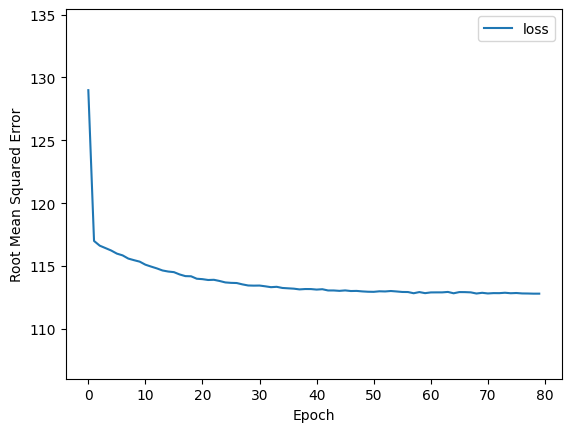


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 620us/step - loss: 12085.2227 - root_mean_squared_error: 109.9328


[12085.22265625, 109.93280792236328]

In [22]:
learning_rate = 0.05
epochs = 80
batch_size = 100
label_name = "median_house_value"

my_model = create_model(learning_rate, fp_feature_layer)

epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

#### Floating point values are not a good way to represent latitude and longitude

## Represent latitude and longitude in buckets

In [8]:
resolution_in_degrees = 1.0

feature_columns = []

latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                                    int(max(train_df['latitude'])),
                                    resolution_in_degrees))

latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column,
                                              latitude_boundaries)

feature_columns.append(latitude)

longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                     int(max(train_df['longitude'])),
                                     resolution_in_degrees))

longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column,
                                               longitude_boundaries)

feature_columns.append(longitude)

buckets_feature_layer = layers.DenseFeatures(feature_columns)

## Train with bucket representations

Epoch 1/100
170/170 [==============================] - 0s 591us/step - loss: 51072.1445 - root_mean_squared_error: 225.9915
Epoch 2/100
170/170 [==============================] - 0s 584us/step - loss: 42080.3633 - root_mean_squared_error: 205.1350
Epoch 3/100
170/170 [==============================] - 0s 566us/step - loss: 34358.9922 - root_mean_squared_error: 185.3618
Epoch 4/100
170/170 [==============================] - 0s 584us/step - loss: 27822.5117 - root_mean_squared_error: 166.8008
Epoch 5/100
170/170 [==============================] - 0s 577us/step - loss: 22521.6562 - root_mean_squared_error: 150.0722
Epoch 6/100
170/170 [==============================] - 0s 571us/step - loss: 18369.8066 - root_mean_squared_error: 135.5353
Epoch 7/100
170/170 [==============================] - 0s 573us/step - loss: 15288.0273 - root_mean_squared_error: 123.6448
Epoch 8/100
170/170 [==============================] - 0s 576us/step - loss: 13162.6279 - root_mean_squared_error: 114.7285
Epoch 9/

170/170 [==============================] - 0s 576us/step - loss: 10194.4561 - root_mean_squared_error: 100.9676
Epoch 55/100
170/170 [==============================] - 0s 588us/step - loss: 10190.7725 - root_mean_squared_error: 100.9494
Epoch 56/100
170/170 [==============================] - 0s 577us/step - loss: 10187.4385 - root_mean_squared_error: 100.9328
Epoch 57/100
170/170 [==============================] - 0s 576us/step - loss: 10183.8975 - root_mean_squared_error: 100.9153
Epoch 58/100
170/170 [==============================] - 0s 581us/step - loss: 10180.6582 - root_mean_squared_error: 100.8992
Epoch 59/100
170/170 [==============================] - 0s 584us/step - loss: 10177.4551 - root_mean_squared_error: 100.8834
Epoch 60/100
170/170 [==============================] - 0s 587us/step - loss: 10174.5576 - root_mean_squared_error: 100.8690
Epoch 61/100
170/170 [==============================] - 0s 571us/step - loss: 10171.1006 - root_mean_squared_error: 100.8519
Epoch 62/100


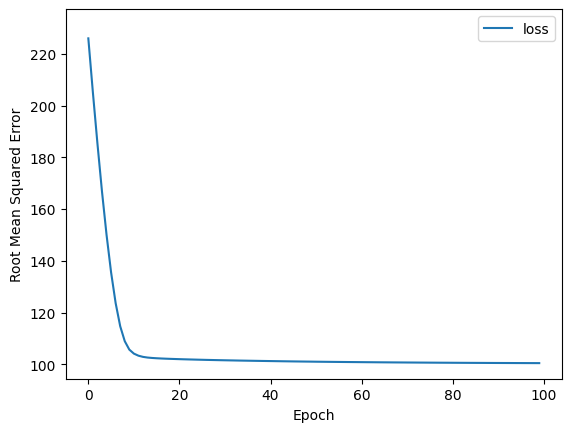


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 590us/step - loss: 9904.3936 - root_mean_squared_error: 99.5208


[9904.3935546875, 99.52082061767578]

In [23]:
learning_rate = 0.05
epochs = 100

my_model = create_model(learning_rate, buckets_feature_layer)

epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")

my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

##### Bucket representation outperformed floating point representations

## A better way to represent location as feature cross
- tf.feature_column.bucketized_column --> bucket the features
- tf.feature_column.crossed_column --> cross the buckets

In [14]:
resolution_in_degrees = 1.0

feature_columns = []

latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

Epoch 1/80
170/170 [==============================] - 0s 630us/step - loss: 52825.7930 - root_mean_squared_error: 229.8386
Epoch 2/80
170/170 [==============================] - 0s 623us/step - loss: 46662.6797 - root_mean_squared_error: 216.0155
Epoch 3/80
170/170 [==============================] - 0s 619us/step - loss: 41020.9570 - root_mean_squared_error: 202.5363
Epoch 4/80
170/170 [==============================] - 0s 611us/step - loss: 35883.6719 - root_mean_squared_error: 189.4299
Epoch 5/80
170/170 [==============================] - 0s 613us/step - loss: 31319.6680 - root_mean_squared_error: 176.9736
Epoch 6/80
170/170 [==============================] - 0s 619us/step - loss: 27223.7168 - root_mean_squared_error: 164.9961
Epoch 7/80
170/170 [==============================] - 0s 626us/step - loss: 23648.4883 - root_mean_squared_error: 153.7807
Epoch 8/80
170/170 [==============================] - 0s 637us/step - loss: 20541.0527 - root_mean_squared_error: 143.3215
Epoch 9/80
170/1

170/170 [==============================] - 0s 618us/step - loss: 9602.6885 - root_mean_squared_error: 97.9933
Epoch 56/80
170/170 [==============================] - 0s 610us/step - loss: 9602.4873 - root_mean_squared_error: 97.9923
Epoch 57/80
170/170 [==============================] - 0s 622us/step - loss: 9602.4629 - root_mean_squared_error: 97.9922
Epoch 58/80
170/170 [==============================] - 0s 625us/step - loss: 9602.5322 - root_mean_squared_error: 97.9925
Epoch 59/80
170/170 [==============================] - 0s 621us/step - loss: 9602.4160 - root_mean_squared_error: 97.9919
Epoch 60/80
170/170 [==============================] - 0s 638us/step - loss: 9602.3877 - root_mean_squared_error: 97.9918
Epoch 61/80
170/170 [==============================] - 0s 624us/step - loss: 9602.1689 - root_mean_squared_error: 97.9907
Epoch 62/80
170/170 [==============================] - 0s 620us/step - loss: 9602.1729 - root_mean_squared_error: 97.9907
Epoch 63/80
170/170 [===============

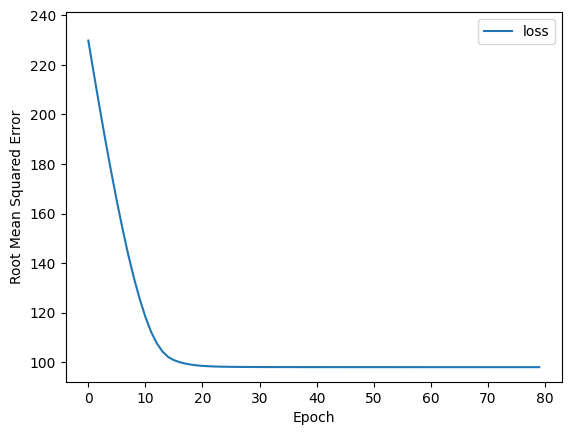


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 633us/step - loss: 9513.3037 - root_mean_squared_error: 97.5362


[9513.3037109375, 97.53616333007812]

In [24]:
learning_rate = 0.05
epochs = 80

my_model = create_model(learning_rate, feature_cross_feature_layer)

epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

##### Lower loss than the previous representations